# CS 3262 - Final Exam - Fall 2022

Welcome to your final exam! 

Logistics:
- Open book/open note/**no internet**
- You are not allowed to discuss the exam with each other
- All questions about the exam will come to me, through email. Do not send any public messages to me, or each other about the exam.
- If there are any clarifications required, I will post them on brightspace and update this document.

A note on the **kinds** of answers I expect: As is our style on HW and in class, many of these questions are open ended and are **not** asking you to repeat what you've read or heard in class. On the contrary, if I read my own words (or a texts) I will mark that down! I expect you to demonstrate your original thoughts. Almost none of these questions require 3-word answers (some do though, those should be clear by the question!). Having said that, I also don't want you to start just typing out vocabulary words that we've used in class. 

**Tip**: If you feel you can't answer a question, skip it and come back. Sometimes reading the entire thing will help clarify the individual parts. If all else fails, I will award partial credit for effort, and a clear explanation of what you're confused about and why. 

**Try and explain your confusion!**

## Changelog

<br/>
<div class='alert alert-info'>

<font size='5'>👾</font> **Note:**  This is **version 2**, updated on 2022-12-12

</div>

## Notebook Setup

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
import seaborn as sns
import pandas as pd
import sklearn as sk

# styling additions
from IPython.display import HTML
style = '''
    <style>
        div.info{
            padding: 15px; 
            border: 1px solid transparent; 
            border-left: 5px solid #dfb5b4; 
            border-color: transparent; 
            margin-bottom: 10px; 
            border-radius: 4px; 
            background-color: #fcf8e3; 
            border-color: #faebcc;
        }
        hr{
            border: 1px solid;
            border-radius: 5px;
        }
    </style>'''
HTML(style)

# Problem 0 - Decision Trees/Random Forests

This problem will use **two extra packages** to make some nice visualizations of our trees! 

<br/>
<div class='info'>
    
<font size='5'>👇🏽</font> **Uncommment and run this cell to install these packages:**
    
</div>


In [1]:
 !pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.0 MB/s eta 0:00:00


In [3]:
import dtreeviz
from dtreeviz import clfviz

Now we're ready. Lets start with the **wine** dataset we used in class:

In [4]:
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()
X = wine.data

In [6]:
X.shape

(178, 13)

This dataset has 13 features:

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Lets pick a subset for easy plotting:

In [8]:
X = X[:,[12,6]]
y = wine.target

Now we're ready!

In [9]:
from sklearn.ensemble import RandomForestClassifier

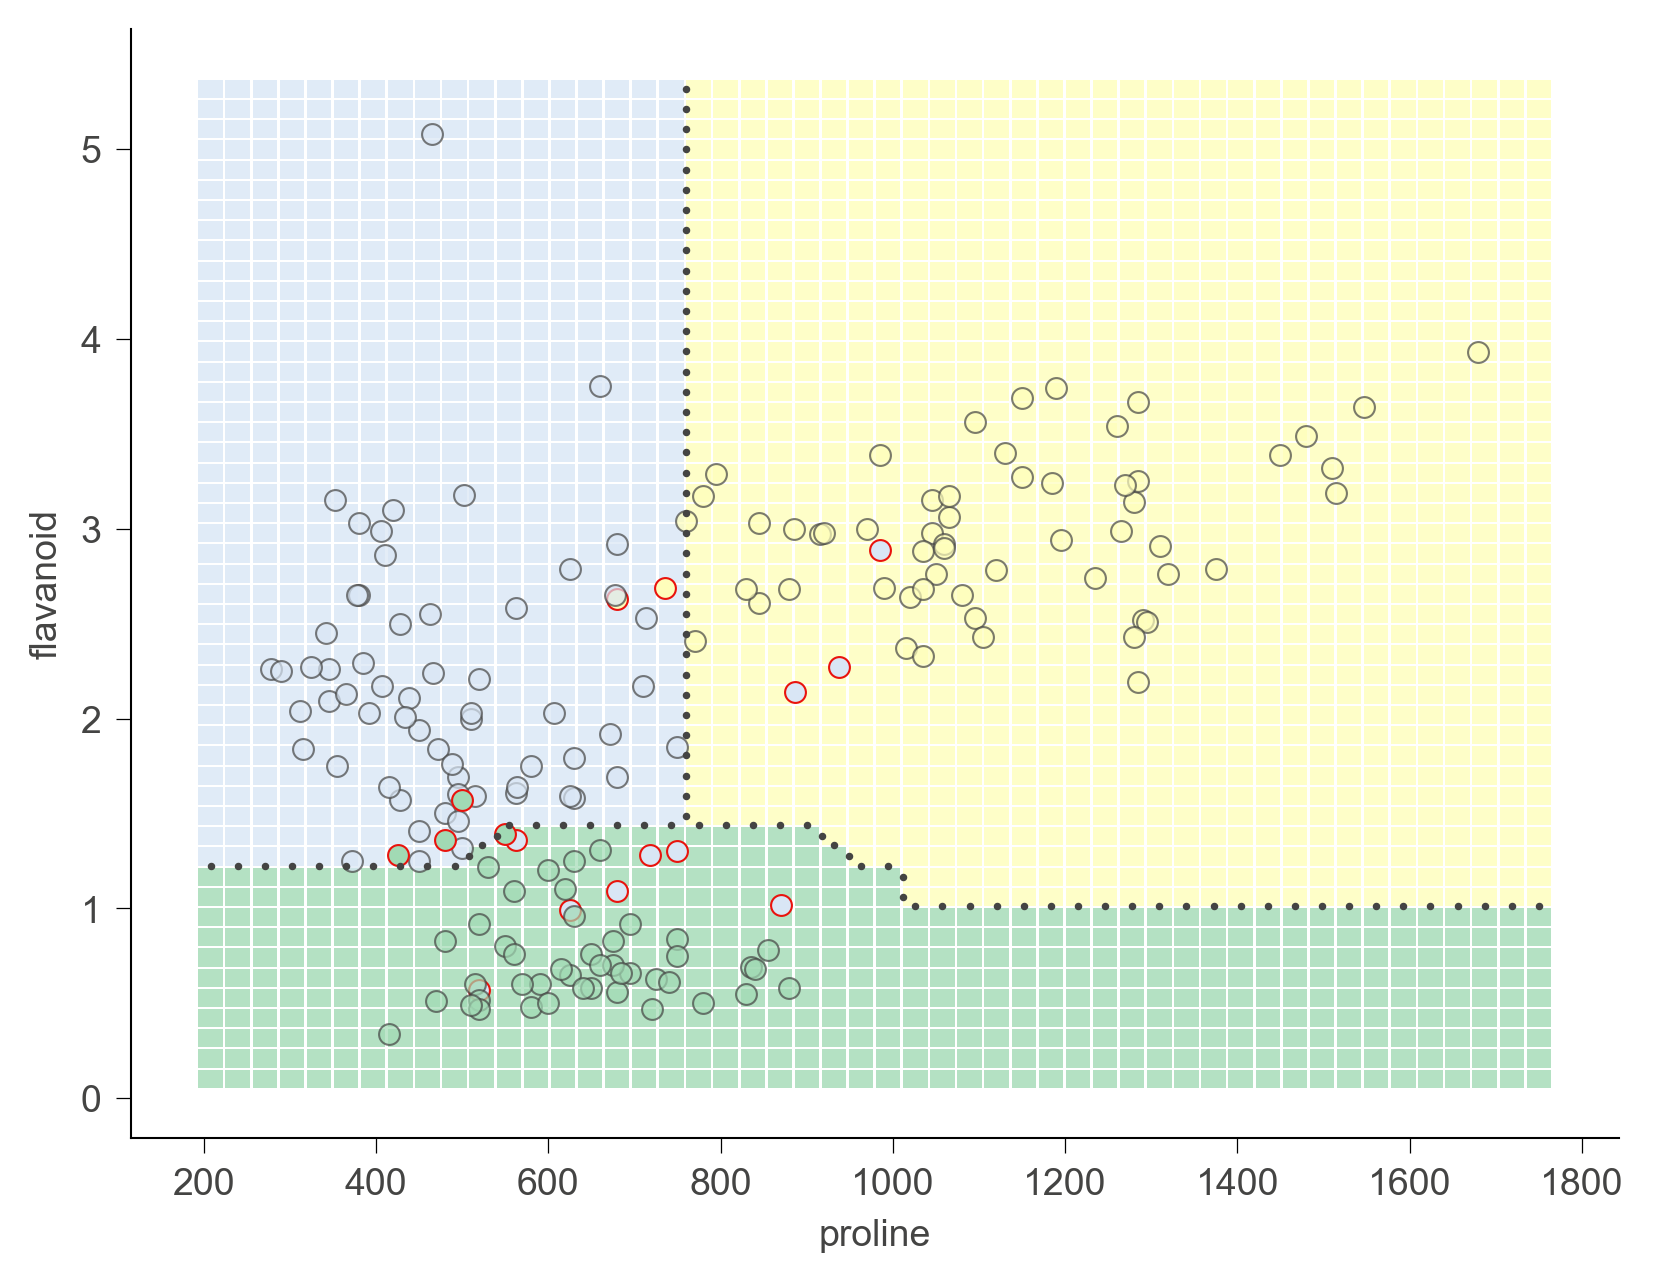

In [10]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=20, n_jobs=-1)
rf.fit(X, y)

fig,axes = plt.subplots(1,1,dpi=300)
clfviz(rf, X, y, ax=axes,
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=['proline', 'flavanoid']);

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** Below, regenerate the above analysis for different values of:

- `min_samples_leaf`
- `max_depth`
- `n_estimators`

Investigate their effect on the decision boundary!
    
</div>

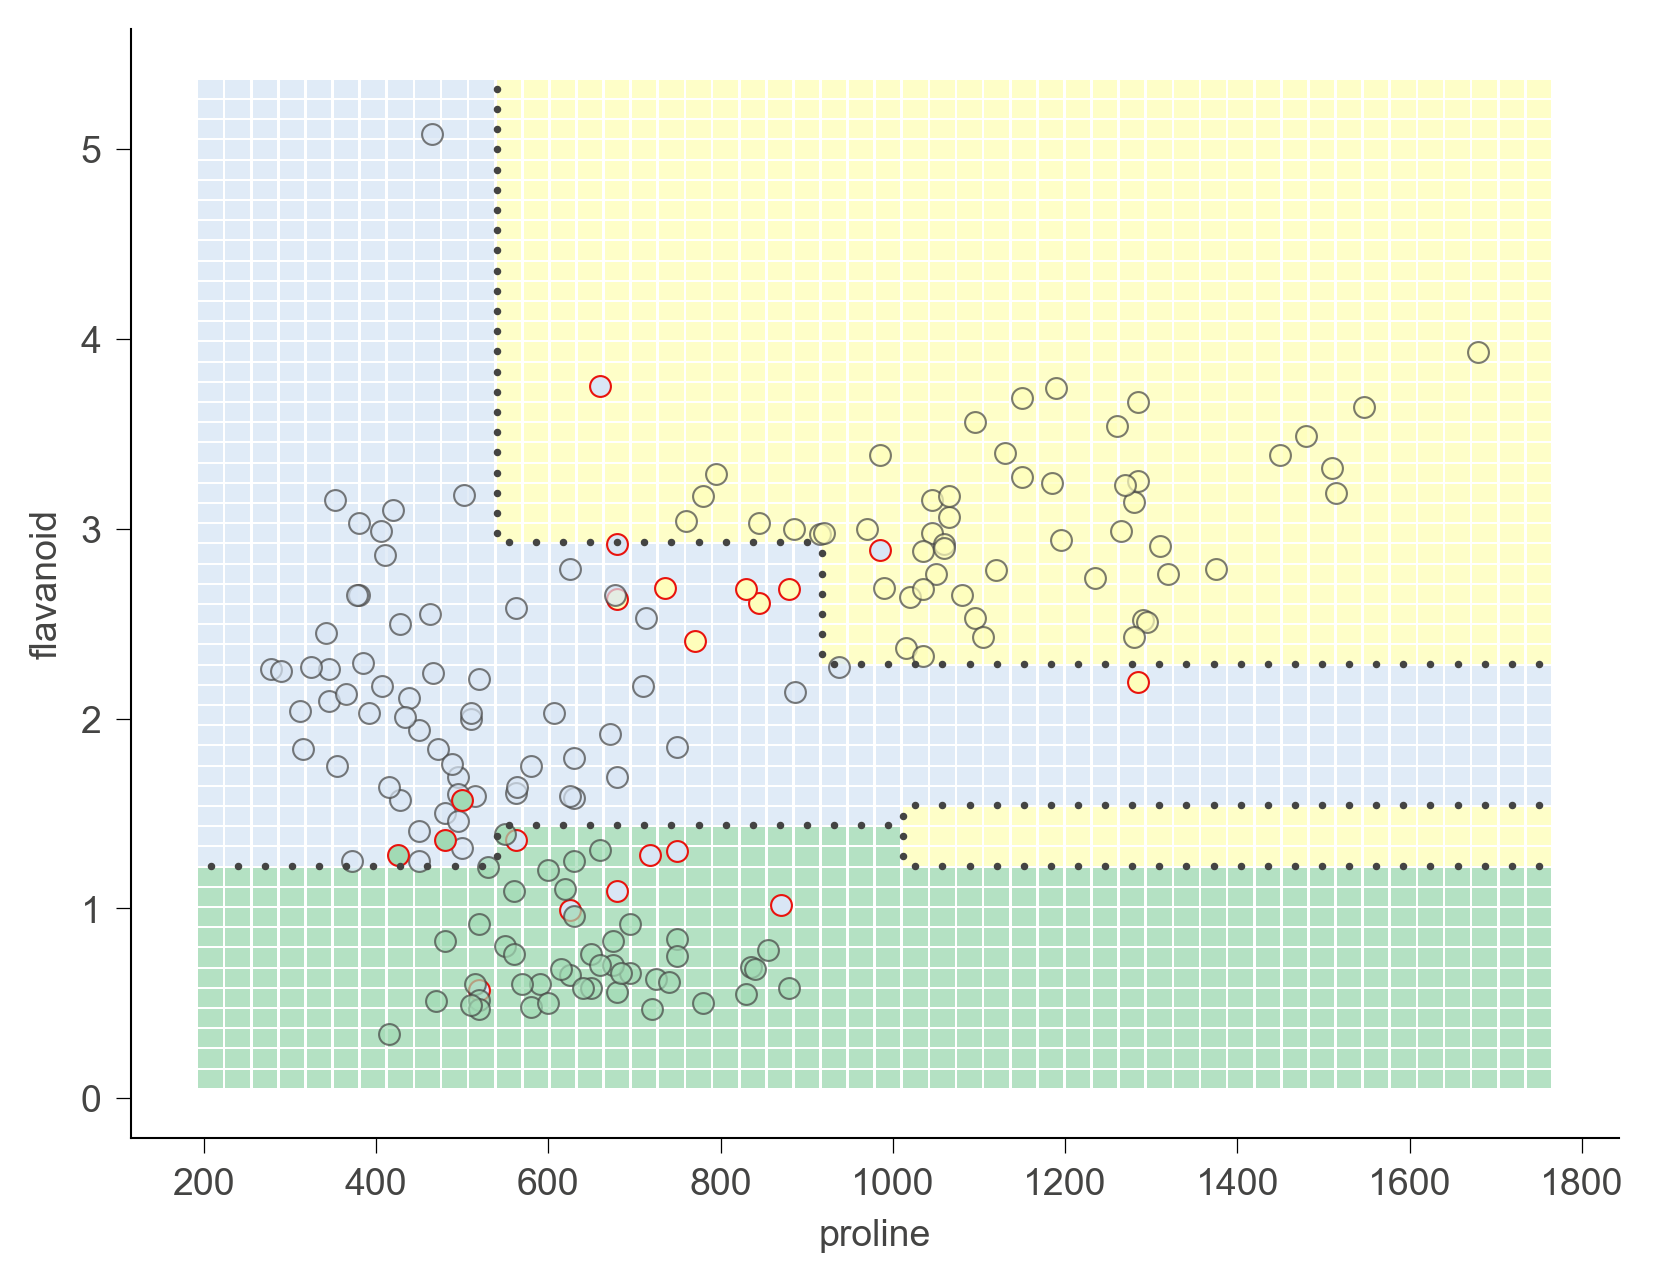

In [18]:
rf = RandomForestClassifier(n_estimators=5, min_samples_leaf=20, n_jobs=-1)
rf.fit(X, y)

fig,axes = plt.subplots(1,1,dpi=300)
clfviz(rf, X, y, ax=axes,
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=['proline', 'flavanoid']);

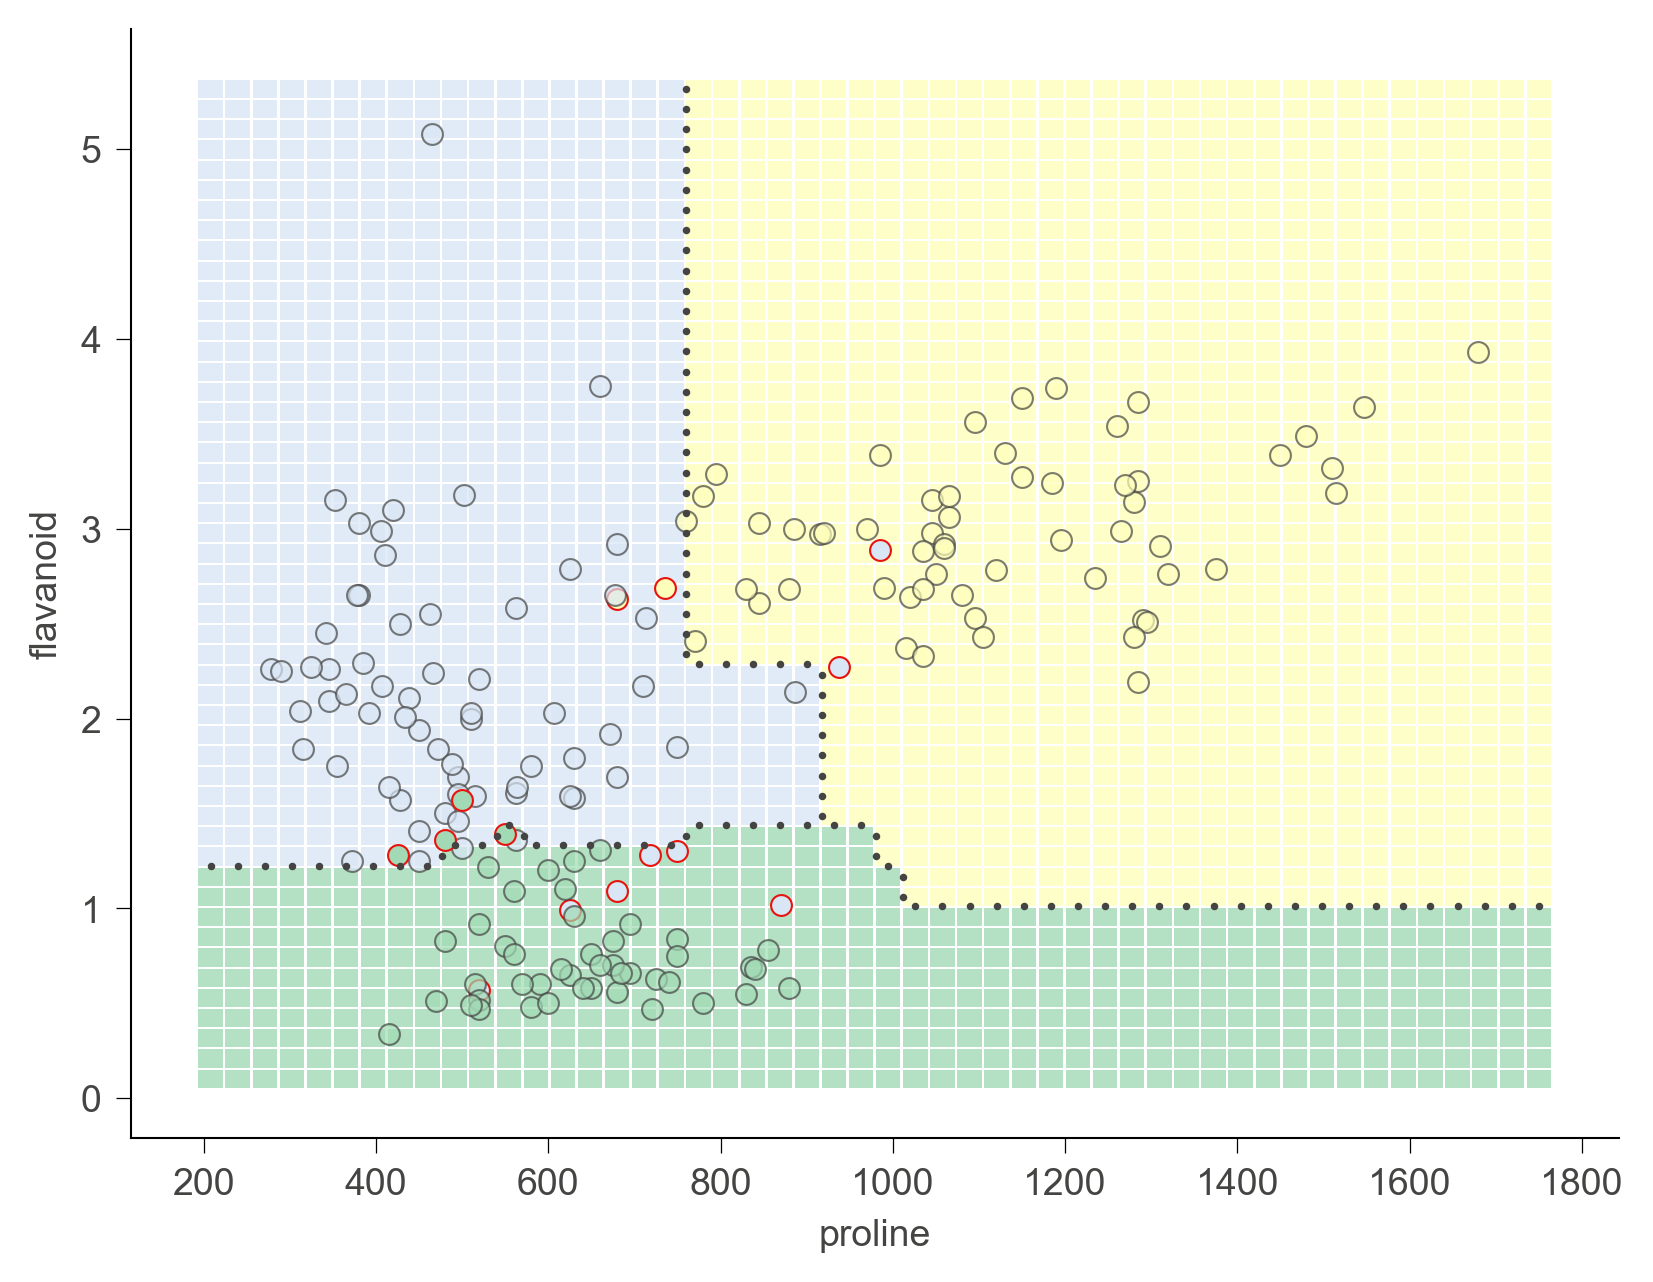

In [21]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, n_jobs=-1)
rf.fit(X, y)

fig,axes = plt.subplots(1,1,dpi=300)
clfviz(rf, X, y, ax=axes,
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=['proline', 'flavanoid']);

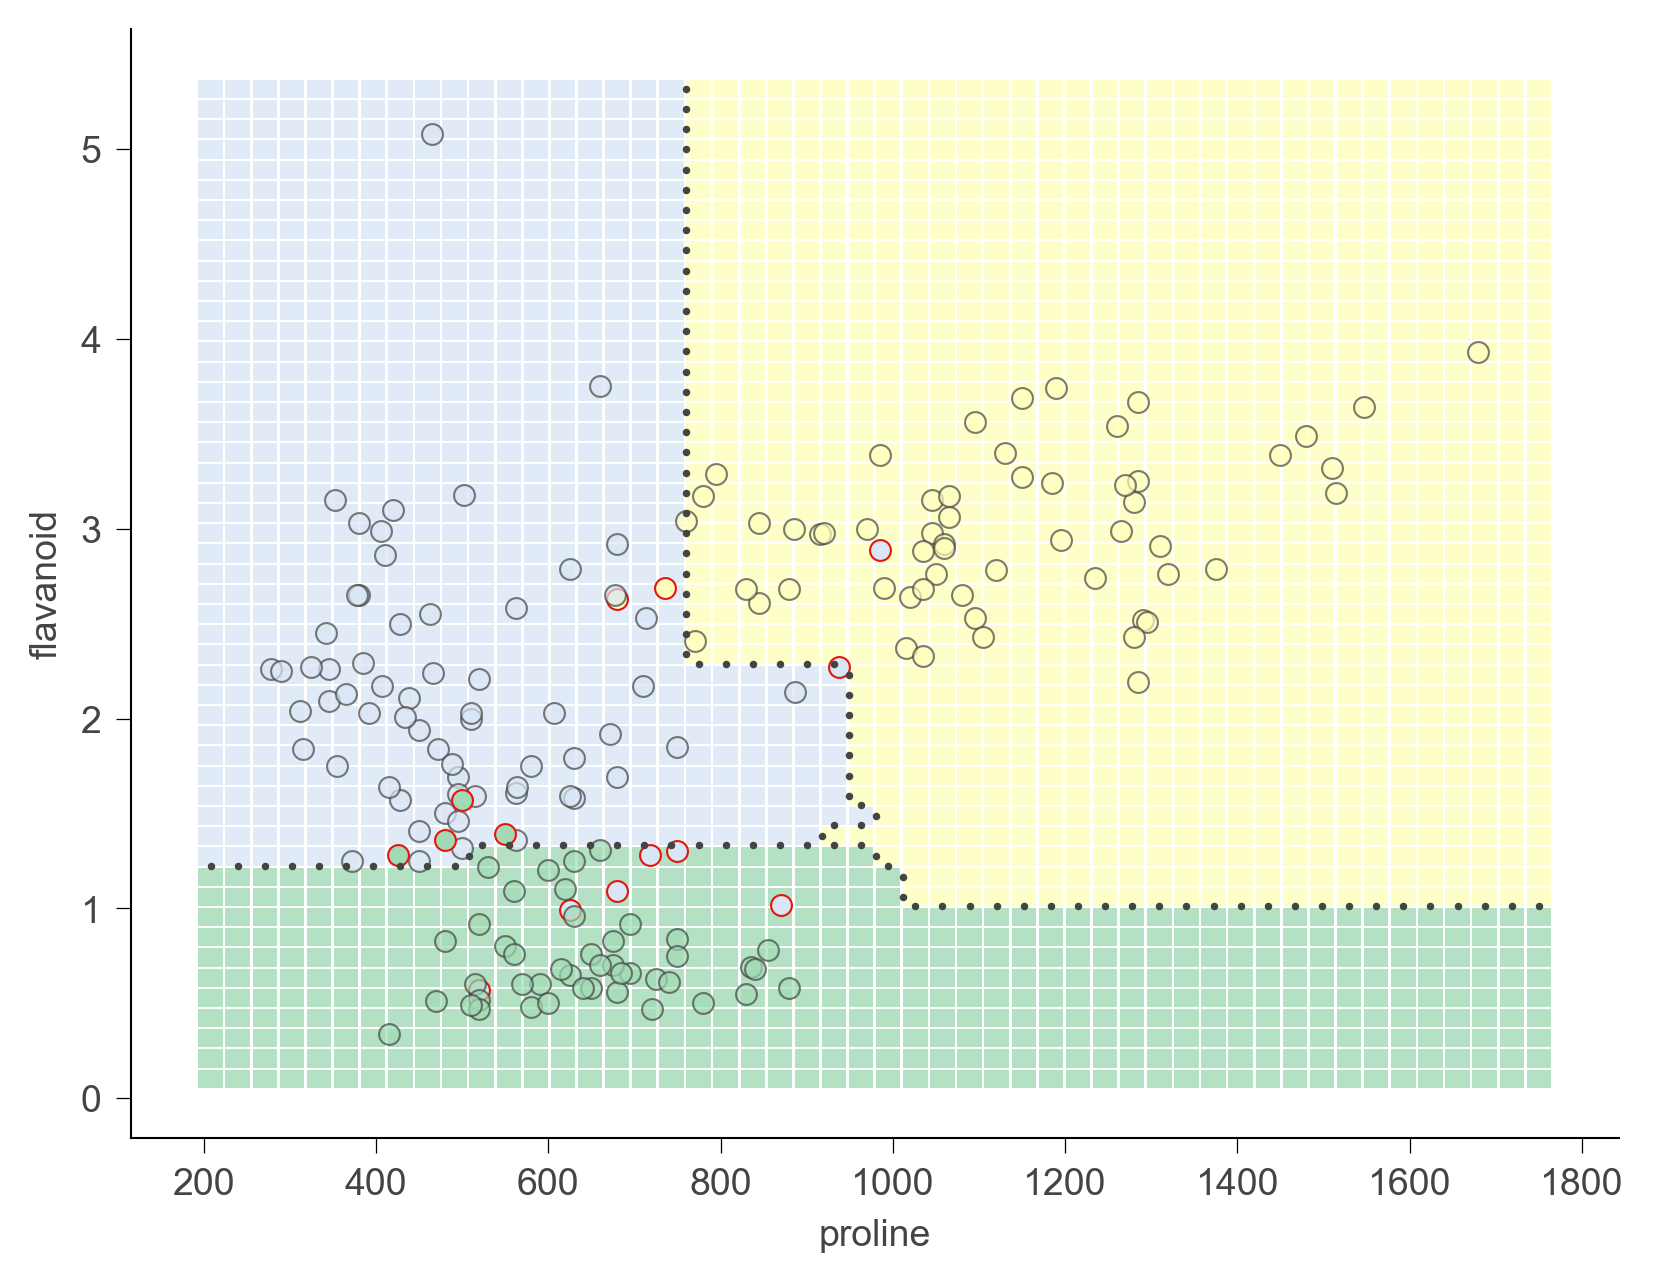

In [32]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=20, n_jobs=-1, max_depth=5)
rf.fit(X, y)

fig,axes = plt.subplots(1,1,dpi=300)
clfviz(rf, X, y, ax=axes,
       # show classification regions not probabilities
       show=['instances', 'boundaries', 'misclassified'], 
       feature_names=['proline', 'flavanoid']);

In [33]:
?RandomForestClassifier

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  After completing the above analysis, write your observations below! Give a well thought-out answer here!

</div>

---

With the original values of n_estimators=50, min_samples_leaf=20, n_jobs=-1 the boundaries are drawn in between the most dense groupings of each value with around 4 green misclassifications, around 10 blue ones and around 2 yellow miscalculations. The decision boundary is a straight line between blue and yellow and almost splits blue and green's overlap in half horizontally. Since the min_samples_leaf value is kept high, there is not a many leaves with a small amount of points which would over capture variance and lead to overfitting. The n_estimators value helps with randomization and repeats the trees almost as a number of sampes, so keeping this high is what led to the more averaged out straight line decision boundaries seen in the first plot. The max_depth feature specifies the amount of depth possibly in each tree, which in the first plot is set at the default, so all nodes are expanded until all leaves are pure or the min_samples_leaf restricts the number of leaves possible. 

For the second plot, I set the values to n_estimators=5, min_samples_leaf=20, n_jobs=-1 to test what happens when there are less trees in the forest, meaning less of a randomized representation of the population because the model is only done five times. This led to a plot that had much more unexpected boundaries that were not averaged out, so unlike the nearly vertical and horizontal boundaries of the 50 estimator plot, the blue territory extends to the top of the plot and to the full right, carving out a small section for one yellow datapoint, which is a sign of overfitting and listening to a small amount of variance that there is a whole territory for one data point, which was elimintated when the estimator was run several times. This plot sees a lot more misclassifications, especially of yellow values, but not many green miscalculations. 

For the third plot, I set the values to n_estimators=100, min_samples_leaf=10, n_jobs=-1 to test what happens with a large amount of repeated sampling of the trees within the forest and even less possible samples within the leaf. By reducing the min_samples_leaf value to 10, there was a possibility for more leafs in the forest, especially those that contain a smaller amount of data so this model was more susceptible to variance. The resulting plot showed that the classifier listened to more noise in the dataset, seen by the boundary for the blue territory being extended further into the yellow to caputre one more blue point instead of continuing as a straight horizontal line. Interestingly, the boundary for the green territory did not largely change so there were still several blues misclassified in the green territory, which was likely due to the increased amount of estimators, which reduced the influence of variance by conducting the random tree 100 times. This model misclassified around 2 yellows 4 greens and 8 blues meaning that it performed better than the original model by listening to more of the variance. 

For the fourth plot, I set the values to n_estimators=50, min_samples_leaf=20, n_jobs=-1, max_depth=5 to test what happens by limiting the amount of depth the model could train on so it could only decide based on its intial seperations of differences. With only 5 layers of depth, this plot looked similar to the third plot in where it drew the decision boundaries for the blue territories, but there was some slight variability in the corners which showed the slight shifting from not having as much information. This model misclassified two yellows, 4 greens and 7 blues, which means this was actually one of the best performing models, but the wiggles around the boundaries make this look like a model that could benefit from increased estimators which would help regularize away some of the specifics of each runs variance to keep the classifier from getting overfitted.

---

# BONUS B1 - PCA

For this bonus problem, run PCA on the **full** wine dataset we imported above! 

In [172]:
from sklearn.decomposition import PCA

<br/>
<div class='info'>
    
<font size='5'>👆🏽</font> **Note:** I have **intentionally** not given you a code example for this problem! Try **reading the sklearn documentation** and use what we currently know to see how to specify a PCA yourself!
    
</div>

In [173]:
X = wine.data
pca = PCA(n_components=2)
#pca.fit(X)

PCA(n_components=2)

In [174]:
#pca.explained_variance_ratio_
#pca.singular_values_

array([0.99809123, 0.00173592])

In [296]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
segmentation_std = scaler.fit_transform(X)

In [297]:
pca.fit(segmentation_std)

PCA(n_components=2)

In [298]:
pca.explained_variance_ratio_

array([0.53513381, 0.46486619])

In [299]:
pca.singular_values_

array([49.38764922, 46.03107759])

In [302]:
scores_pca=pca.transform(segmentation_std)

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Comment below on the quality of the fit! How did PCA do on this dataset? Give a good answer here!

</div>

---

The singular values show corresponds to the selected components, so 49.387 for the first component and 46.0310 for the second component. The explained variance ratio is the percentage of variance explained by each of the selected components, so here, the first component explains 53.5% of the variance, which is nearly all of the variability within the dataset. The second component has an explained variance of 46.48% which is not a large amount of the variability within the dataset. This is a good indicator that we do not need to add more components to the PCA because with only two we have already jointly explained a lot of the variance in the dataset. Since the second component is a smaller proportion of the variability, this might actually be an indicator that this dataset only needs one component to explain its variance since it does a good job fitting to the data. This is also a sign that a PCA might work well with dimension reduction on this dataset since with only one component, most of the variance is captured. 

---

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Explain what exactly PCA is **doing** to our dataset. How is it different than linear regression? Comment below!

</div>




---

A PCA is a numerical decomposition of a matrix of values that chooses the components that would maximize the variance of the data. Each component is an axis of variation, so the PCA is a form of dimensionality reduction that throws away the dimensions with the least variance to prioritize the dimensions that explain large amounts of variance. Essentially, the PCA looks at the entirety of the dataset and through decompositon, decides the direction of the data that maximizes the distance between the points, which would thus explain the most amount of variance, and the first component is composed of a vector that assigns weights to show the direction as a full new axis on the data so the data could be pivoted in that direction if neede. The next component is always perpindicular to the first component which seeks to explain the residual variance in the opposite direction. With only those two components, the data could then be mapped onto a new plot with the PC1 and PC2 as the new axises which would create the greatest amount of distance between values compared to the original axis variables. 

This is different from linear regression because even though their outputs look similar of a line that shows the direction of the data, a PCA is an unsupervised method that does not see the labels of the data and operates purely on maximizing variance, whereas the linear regression is finding weights to create a line of best fit that minimizes distance to each point. Minimizing distance and maximizing variance can produce similar outcomes, but the different processes and the absense of labels gives the PCA a greater ability to see how each component input contribute to variance individually whereas the linear regression can only produce the singular line and does not create multiple components or work in an unsupervised setting. 

---

# Bonus B2 - KMeans

For this problem run a **K-Means** on the **result of your PCA dimensionality reduced data** for the following:
- 2 components
- 5 components
- 10 components

**And give the three plots!**

<br/>
<div class='info'>
    
<font size='5'>👆🏽</font> **Note:** I have **intentionally** not given you a code example for this problem! Try **reading the sklearn documentation** and use what we currently know to see how to specify a KMeans yourself!
    
</div>

In [304]:
from sklearn.cluster import KMeans

In [312]:
kmeans_pca2 = KMeans(n_clusters=2, random_state=42, init="k-means++")
kmeans_pca2.fit(scores_pca)
kmeans_pca2.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [328]:
df_segm_pca_kmeans["Segment"]=df_segm_pca_kmeans['Segment Kmenas PCA'].map({0:"first",
                                                                           1:"second"})

NameError: name 'df_segm_pca_kmeans' is not defined

In [327]:
#plotting the data by PCA component
x_axis = df_segm_pca_kmeans2["Component 2"]
y_axis = df_segm_pca_kmeans2["Component 1"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans["Segment"], palette = ['g', 'r'])
plt.title("Cluster by PCA Components")
plt.show()

NameError: name 'df_segm_pca_kmeans' is not defined

In [313]:
kmeans_pca5 = KMeans(n_clusters=5, random_state=42, init="k-means++")
kmeans_pca5.fit(scores_pca)
kmeans_pca5.labels_

array([0, 1, 2, ..., 4, 0, 2], dtype=int32)

In [ ]:
#plotting the data by PCA component
x_axis = df_segm_pca_kmeans5["Component 2"]
y_axis = df_segm_pca_kmeans5["Component 1"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans["Segment"], palette = ['g', 'r'])
plt.title("Cluster by PCA Components")
plt.show()

In [314]:
kmeans_pca10 = KMeans(n_clusters=5, random_state=42, init="k-means++")
kmeans_pca10.fit(scores_pca)
kmeans_pca10.labels_

array([0, 1, 2, ..., 4, 0, 2], dtype=int32)

In [ ]:
#plotting the data by PCA component
x_axis = df_segm_pca_kmeans10["Component 2"]
y_axis = df_segm_pca_kmeans10["Component 1"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans["Segment"], palette = ['g', 'r'])
plt.title("Cluster by PCA Components")
plt.show()

I attempted plotting the Kmeans PCa combination but I was struggling with the visualization so I left my code for what the labels for each section of clusters would be and how far I got in building the visualizations!

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Pause-and-Ponder:**  How are KMeans KNN's different? How are they similar? Explain!

</div>

---

K means is an unsupervised learning technique that learns from similar measures of variability in the dataset to predict potential groups without seeing any labels whereas K nearest neighbors is a supervised model used for classification and likely for regression. They both involve grouping so sometimes their results will look similar but they have different mathematical computations and uses. They do both require specifications about how many clusters or neighborhoods the researcher is looking for, which influences the results so they are similar in the fact that they have a similar hyperparameter that must be tuned in the process to determine the best fit for the dataset to explain the most variation. 

---

# Problem 1


Lets discuss a **regularized linear regression** given by:

$$
\min_w \| \boldsymbol{X}w-y \|^2_2 + \alpha \|w\|^2_2 
$$

## 1.A
This equation has two terms. The term on the left is the usual **linear regression error** we discussed in class.

<br/>
<div class='info'>

<font size='5'>🤔</font> **Question:**  If $\boldsymbol{X}$ is of size $100 \times 3$,

- what is the dimension of $w$?
- what is th dimension of $y$?
- how big is my dataset?

</div>

---

- w is dimension (3,1)

- y is dimension (100,1)

- The dataset is dim (100,4)

---

# 1.B

Now for the second term!

<br/>
<div class='info'>

<font size='5'>🤔</font> **Questions:** Explain in words what the second term is doing? How does having it in here **regularize** the problem?

</div>

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Hint:**  We gave three different explanations for this in class! 

</div>

---

The second term establishes a penalty that can numerically limit how big the weight vector can be because by creating controls on the weight vector, there is some slope and bias control. With too large of a weight vector there is a risk of introducing bias into the equation or overfitting the model by listening to outliers in the dataset that overinflate the slope and over account for variance in the dataset. The augmented error includes this regularizer which simplifies the equation. By not allowing the weight vector to get too big, the slope and bias are both contrained which through duality theory creates a contrained optimization problem that regularizes the problem by introducing a penalty. The alpha controls how much the problem cares about the size of w, so a larger alpha means a stricter boundary and a smaller boundary means you care more about the optimal line and not the size of w. An alpha of zero means this equation would be the same as a normal linear regression problem.

---

## 1.C

In sklearn, the regularized linear regression is implemented in a class called `Ridge` in the `linear_model` module, and takes an `alpha` parameter as discussed above:

In [34]:
from sklearn.linear_model import Ridge

In [36]:
Ridge?

Lets implement this model on the same wine dataset above with different `alpha` values:

In [49]:
alphas = [1e-2,1e-1,0.5,1,5]

Type your code below:

In [42]:
clf = Ridge(alpha = 1e-2)
clf.fit(X,y)
clf.score(X, y, sample_weight=None)

0.7793516583124783

In [43]:
clf = Ridge(alpha = 1e-1)
clf.fit(X,y)
clf.score(X, y, sample_weight=None)

0.7793514486883791

In [45]:
clf = Ridge(alpha = .5)
clf.fit(X,y)
clf.score(X, y, sample_weight=None)

0.7793463983871751

In [46]:
clf = Ridge(alpha = 1)
clf.fit(X,y)
clf.score(X, y, sample_weight=None)

0.7793307684905738

In [47]:
clf = Ridge(alpha = 5)
clf.fit(X,y)
clf.score(X, y, sample_weight=None)

0.7788591022170983

## 1.D

<br/>
<div class='info'>

<font size='5'>🤔</font> **Question:**  Comment on what you observe here. Which does better? Why? Does this make sense given what we've discussed in class? Why or why not? I'm not looking for a short answer here!

</div>

---

As the alpha is increasing, the coefficient of determination of the prediction is decreasing meaning a looser alpha leads to a higher R2. This means that the lower the alpha, the higher the R2 value and a stricter alpha means a lower R2 value. This makes a lot of sense since we discussed that the alpha value works as a regularizer because it is a constraint on the weight vector to limit its size. This means that the stricter the alpha by having a larger value is creating a stricter limit on how large the weight vector can be which directly limits how close the weights can get to the optimal line which would decrease the R2 by making the line less descriptive of the data. But in increasing the alpha, the line is limiting both the slope and bias, so it is up to the researcher to determine the threshold that accounts for the potential bias in the dataset. If the alpha is set to zero simply to maximize the potential R2, this might be artificially inflating the model's predictability by introducing bias into the estimator and potentially overfitting the model by not at all accounting for this or establishing limits. At the same time, by creating too harsh of an alpha, this would come at a loss of predictability so this would be a metric that might change which direction is optimal depending on the context of the research problem. Either way, all of the alphas chosen ended up with relatively similar R2 scores, so the predictability is largely a result of the data and the intitial model, but when chosing exactly what threshold, the alpha does make a difference which is to be expected because of its intended use as a regularizer. 

---

# Problem 2

## 2.A

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Question:** Explain these concepts in words:
- underfitting
- overfitting
- bias
- variance

Draw a figure (draw it yourself, **not** using any code) to aid in your explanation!
   
</div>

**Note:** Once you've drawn this figure, either on paper, or using your mouse using an online tool, etc. you can **embed it** into your notebook like this:

```
![](foldername/figurename.jpg)
```

---

- Underfitting is the concept of not measuring enough of the variance in the dataset so your model is not an accurate reflection of the variation and thus underperforms on a withheld test set and the training set because it does not understand enough of the relationship between the variables.
- Overfitting is the concept of measuring too much of the variance in the dataset so your model has essentially memorized the dataset and not the general relationship between the variables. This means it will perform well on the train set but not perform well on a withheld test because the model only knows how to return the exact values within the test set and not how to predict the real life data. 
- Bias is degree to which a model is overinfluenced by the distribution of values in the dataset and the measure of how different the dataset's measure is compared to the real population's measure. Bias is the amount the prediction is off from the target.
- Variance is the spread of values in the dataset, so a measure of variance describes how much each point in the dataset differs from each other so more variance is more spread and less variance means more concentrated data. Variance is how much spread there is within the predicted values. There is a tradeoff between bias and variance because in attempting to reduce one, a model has the potential of increasing the other because a model with a low amount of variance could potentially be highly biased and restricting the amount of bias in the model means potentialy allowing for more variance. 

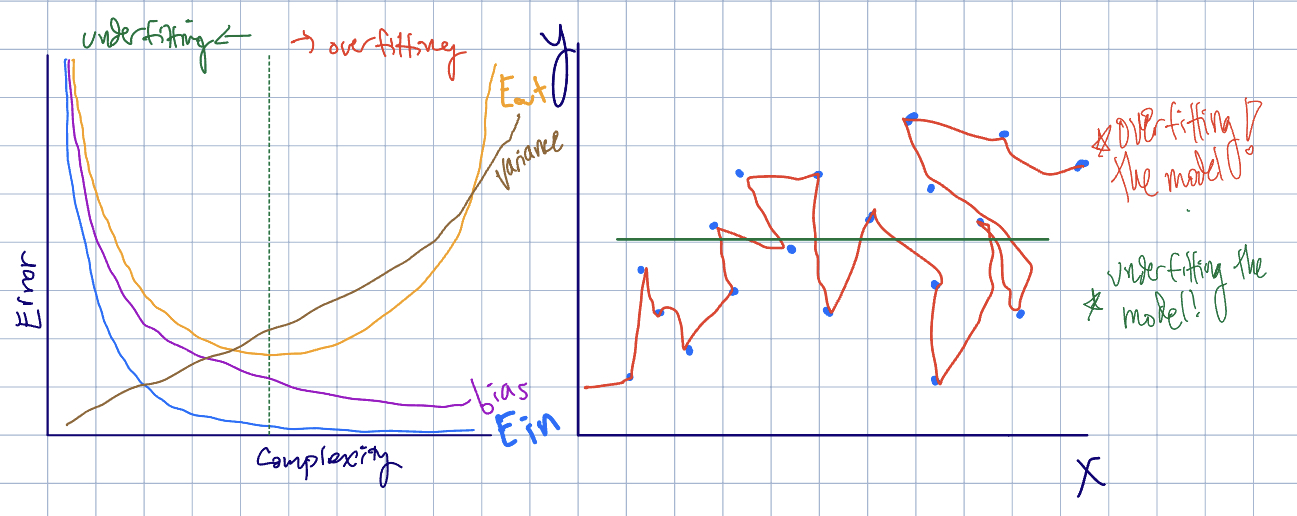

---

## 2. B

<br/>
<div class='info'>

<font size='5'>🤔</font> **Question:**  Above, you explained what the `C` parameter does for SVMs. Now, explain it but from the perspective of **regularization**! That is, how does it act as a regularizer for the SVM? Think about it!

</div>

---


The C value determines how hard or soft the boundary is for the SVM to consider and how strict to allow or forbid errors in the calculation. For a higher value of C, the SVM treats the errors more severly and this changes the place the SVM would allow the boundary to be placed. This controls the measure of training and testing error because if you allow more error on the training set then you reduce the chance of overfitting the model and could allow for a higher predictive value on the testing set. This helps regularize the training set model to make it more applicable for the testing set by being more careful about just how sensitive the SVM is to error. 

---

# Problem 3 - Machine Learning Mini Project

On this final, I want you to use everything you've learned and try to do a simple problem from start to finish on your own!

Lets use a dataset from Spotify on song popularity. Lets first modify the dataset for our final:


# Initial Preparation

In [52]:
df = pd.read_csv('song_data_orig.csv')
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

As we can see, `song_popularity` is actually a numeric column:

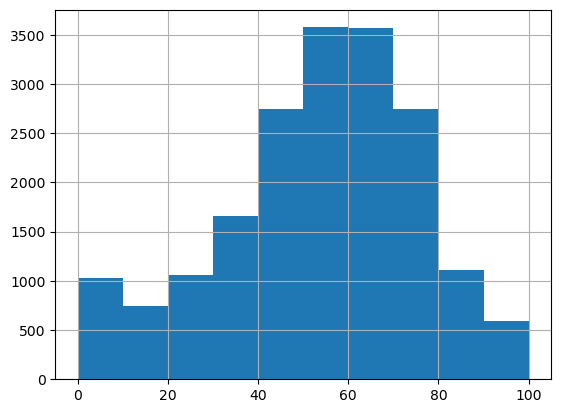

In [53]:
df['song_popularity'].hist();

Lets make this a "class label" called `is_pop` using a threshold value of 80:

In [54]:
df['is_pop'] = (df['song_popularity'] >= 80).values.astype('int')

In [55]:
df.query('is_pop == 1')

song_name  song_popularity  \
5                              Bring Me To Life               80   
6                                   Last Resort               81   
8                                Mr. Brightside               80   
9                                   Sex on Fire               81   
13                                   Can't Stop               81   
...                                         ...              ...   
18671             Tie Me Down (with Elley Duhé)               84   
18697  Magic In The Hamptons (feat. Lil Yachty)               85   
18702                                      Body               86   
18704                         If You're Over Me               81   
18734                  Love Lies (with Normani)               89   

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
5                235893      0.008950         0.316   0.945          0.000002   
6                199893      0.000504         0.581   0.887          0.001110   
8                222586      0.001080         0.330   0.936          0.000000   
9                203346      0.001720         0.542   0.905          0.010400   
13               269000      0.017900         0.618   0.938          0.000000   
...                 ...           ...           ...     ...               ...   
18671            218295      0.135000         0.548   0.839          0.000000   
18697            164640      0.660000         0.769   0.479          0.000000   
18702            163216      0.047600         0.752   0.764          0.000094   
18704            189000      0.061500         0.647   0.853          0.000000   
18734            201707      0.095600         0.708   0.648          0.000000   

       key  liveness  loudness  audio_mode  speechiness    tempo  \
5        4    0.3960    -3.169           0       0.1240  189.931   
6        4    0.2680    -3.659           0       0.0624   90.578   
8        1    0.0926    -3.660           1       0.0917  148.112   
9        9    0.1360    -5.653           1       0.0540  153.398   
13       9    0.1670    -3.442           1       0.0456   91.455   
...    ...       ...       ...         ...          ...      ...   
18671    6    0.1020    -2.371           1       0.0644   98.932   
18697    1    0.0914    -5.339           1       0.0385   96.051   
18702    1    0.0543    -4.399           1       0.0380  121.958   
18704    8    0.0620    -4.516           1       0.0904  103.846   
18734    6    0.1340    -5.626           1       0.0449  143.955   

       time_signature  audio_valence  is_pop  
5                   4          0.320       1  
6                   4          0.724       1  
8                   4          0.234       1  
9                   4          0.374       1  
13                  4          0.875       1  
...               ...            ...     ...  
18671               4          0.314       1  
18697               4          0.803       1  
18702               4          0.582       1  
18704               4          0.618       1  
18734               4          0.338       1  

[1701 rows x 16 columns]

Now we have our label, so lets get rid of the `song_popularity` so we don't accidentally use it below!

In [56]:
df = df.drop('song_popularity',axis=1)
df.columns

Index(['song_name', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'is_pop'],
      dtype='object')

Now we're ready to proceed!

# Machine Learn!


<br/>
<div class='info'>

<font size='5'>🧑🏽‍💻</font> **CODE-IT-UP**: 
I want you to take this dataset and create at least 4 separate models **(KNN with different values of K all count as a single model)** to predict the `is_pop` variable. 

Assess each of them separately, and then jointly at the end!

    
</div>

# Exploratory Data Analysis (EDA)

Below, conduct some EDA on this dataset. Observe your features. Are they related to each other? If so, how? If not, does that matter?



<br/>
<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint**: We've been using a great particular plot for EDA in class and on our HW! 

</div>

**Note:** I am **not** asking for a single plot here!

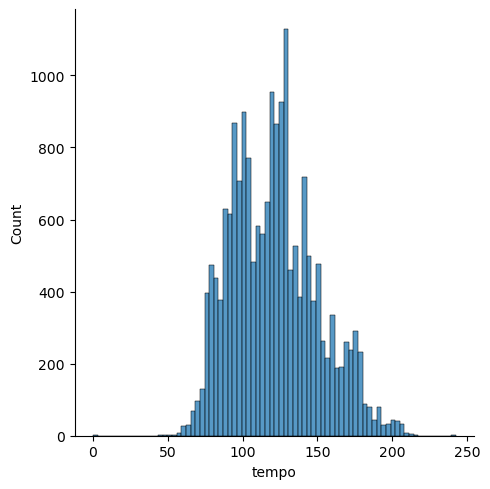

In [205]:
#looking at one single variable
sns.displot(df, x='tempo');
#this has a relatively normal distribution

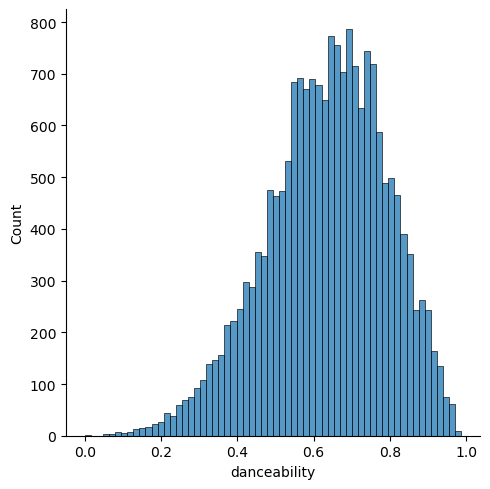

In [206]:
#looking at one single variable
sns.displot(df, x='danceability');
#this has a relatively normal distribution

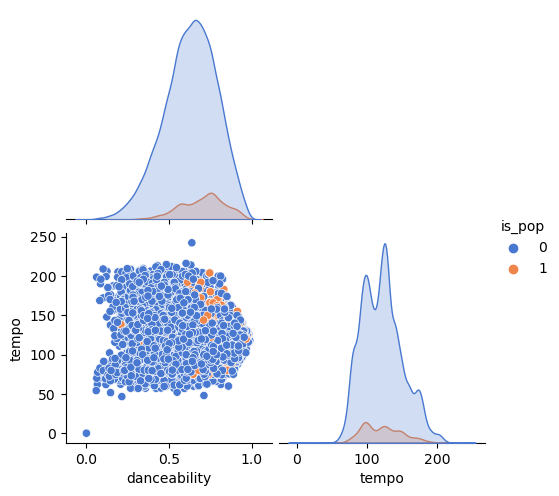

In [211]:
sns.pairplot(df, vars=df.columns[[3,11]], hue='is_pop',corner=True, palette='muted',);

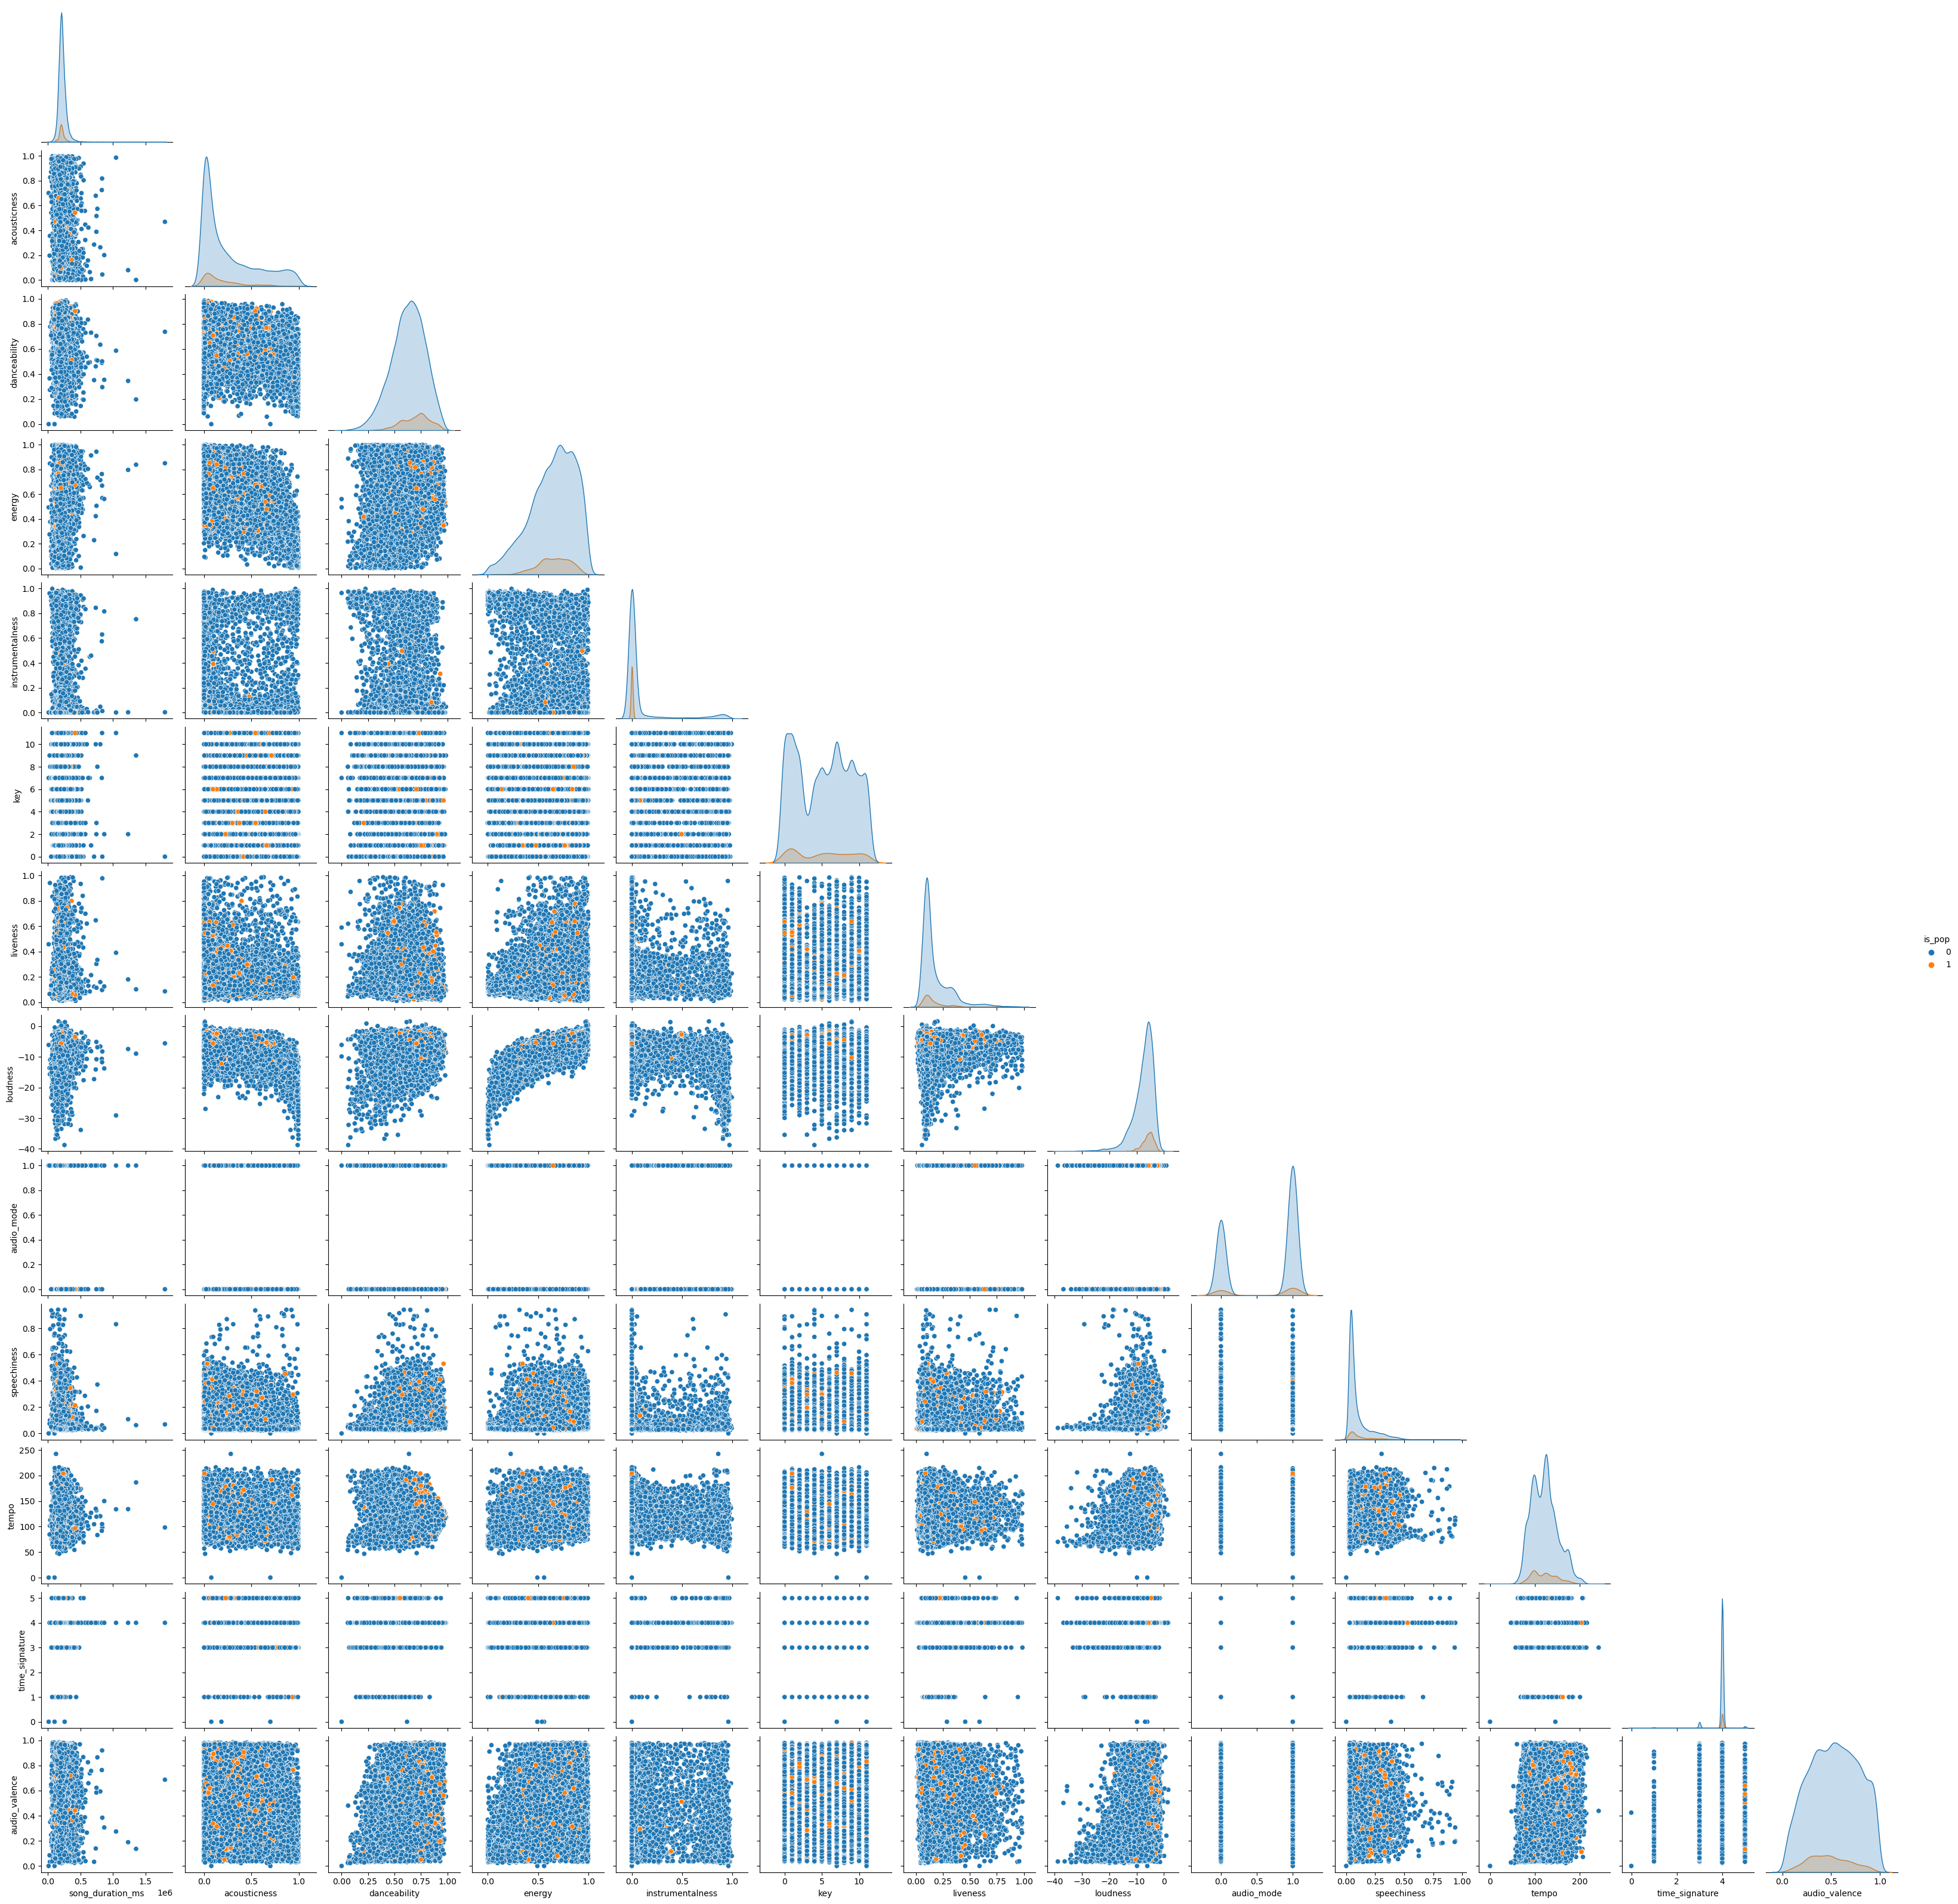

In [212]:
sns.pairplot(df, vars=df.columns[1:-1], hue='is_pop',corner=True);

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Pause-and-Ponder:**  Now that you've done some exploration, write down your comments/observations here. What did you observe?

    
</div>

---

By looking at the pair plot of all the potential relationships between the variables, it shows that a there is a lot of variance in the dataset and not all the variables would be good contenders for model because there is a random distribution between the pop and not pop values so they would not produce a strong prediction of their difference because of the amount of overlap in the values. So, using the paired plot I looked for the two variables that had the createst concentration in pop values so that they could be used as the predictor variables and try to find some similarities in the popular songs. If there is almost a random distribution, it would be more difficult to find similairities. I did not look for the plot with the greatest distinction between pop and not pop because no plot had a large distinction and all of them had the pop songs completely mixed in with the not pop songs which makes since considering how varied the elements that go into popular songs would be, which is proven by these plots.

Because of these considerations, I decided to choose tempo and danceability as my two features that I would use for all four models so I could compare the results across them. These seemed like visually a good set of comnined information with a concentration of popular songs in the upper right corner and intuitively this made sense as a set of predictive variables as well. 

---

# Prepare your dataset

Using your insight from above, and in preparation of your plan below, is there anything else you need to do to "prepare" your dataset? 

Before you code it up, comment below what you will do **and why**. That is, explain why you are doing something extra to the dataset! Use the tools/techniques and concepts we learned in class!


<br/>
<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint**: Right now, we only have a single dataset - we probably need to at least carve out a test set! 

</div>

<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint**: **Hint**: Do we need to do anything else to our features? Think about this!

</div>

<div class='info'>

<font size='5'>🙋🏽‍♀️</font> **Hint**: **Hint**: These are **not** the only thing I expect you to do here! I want you think about this! 
</div>

<div class='info'>
    
<font size='5'>🤔</font> **Pause-and-Ponder:**  Below, write down **your plan of action** - based on this EDA - what are you going to try? And Why?
    
</div>

---

Since this is such a large and imbalanced dataset there are a few things that I think would be helpful before creating my models. 

One, I need to remove any NA values since that could mess with the computation and they will not be helpful in my analysis. 

Two, I need to stratify my sample so I have an equal number of not_popular and popular songs in my dataset so the equal classes can contribute equal amounts of information and not overly weight my model to the side of the more common class even though that would not increase the predictability. So I will randomly select from the larger class to make the two even

Three, I need to split my dataset to a training and testing so I can train my models on part of the dataset and then keep some of the dataset aside to see how my model really performs on the withheld information.

Then, I will be conscious of how running each model requires me to respecify my X and y so I will rerun the train and test and stratify code if necessary to keep the levels equal when rerunning models.

---

In [215]:
#removing nas
df=df.dropna()

In [216]:
df.shape

(18835, 15)

In [ ]:
#stratifying to have equal classes 
#splitting my datasets 
notpop=df[df['is_pop'] == 0]
pop=df[df['is_pop'] == 1]

In [218]:
#checking the size of the classes so there can only by 1701 not popular songs
pop.shape, notpop.shape

((1701, 15), (17134, 15))

In [219]:
notpopdf=notpop.sample(n = 1701)

In [220]:
notpopdf.shape

(1701, 15)

In [222]:
#Then I Combined the two dataframes to make a new stratified sample
frames=[pop,notpopdf]
strat_df = pd.concat(frames)
strat_df.shape

(3402, 15)

In [223]:
#Checking the count
strat_df.groupby(['is_pop'])['is_pop'].count()

is_pop
0    1701
1    1701
Name: is_pop, dtype: int64

In [224]:
#Deciding my x and y 
X = strat_df.iloc[:,[3,11]].to_numpy()
y = strat_df.is_pop.to_numpy()
y.shape,X.shape

((3402,), (3402, 2))

In [226]:
#I made a column of ones to attatch to X
ones_col_vec = np.ones(3402)
ones_col_vec=ones_col_vec.reshape(3402,1)
ones_col_vec.shape

(3402, 1)

In [227]:
#And added it to X
X = np.concatenate((ones_col_vec, X), axis=1)
X.shape

(3402, 3)

In [228]:
#Checking the first few rows to make sure it looks okay
X[:5]

array([[  1.   ,   0.316, 189.931],
       [  1.   ,   0.581,  90.578],
       [  1.   ,   0.33 , 148.112],
       [  1.   ,   0.542, 153.398],
       [  1.   ,   0.618,  91.455]])

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [231]:
print('X_train : ')
print(X_train[:5])
print('')
print('X_test : ')
print(X_test[:5])
print('')
print('y_train : ')
print(y_train[:5])
print('')
print('y_test : ')
print(y_test[:5])

X_train : 
[[  1.      0.399 117.089]
 [  1.      0.767  81.031]
 [  1.      0.854 145.976]
 [  1.      0.637 129.923]
 [  1.      0.855 122.078]]

X_test : 
[[  1.      0.448  97.773]
 [  1.      0.717  81.047]
 [  1.      0.778 102.95 ]
 [  1.      0.877  99.977]
 [  1.      0.588 118.159]]

y_train : 
[1 1 1 1 1]

y_test : 
[1 1 0 1 1]


In [236]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2279, 3), (1123, 3), (2279,), (1123,))

# ML Models

For each of your models below, **train** and **evaluate** them! 

For each, write **why** you are evaluating them in a certain way, and **how** you chose a particular value for a parameter, etc. 

<br/>
<div class='info'>
    
<font size='5'>🙋🏽‍♀️</font> **Tip**: You **are** allowed to use the scikit learn documentation [🔗 linked here](https://scikit-learn.org/stable/index.html)!
    
</div>

## Model 1 - Linear Regression

In [237]:
X=X_train
y=y_train
X.shape,y.shape

((2279, 3), (2279,))

In [238]:
#Make our weight vector for our regression to do it manually 
w_lin = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w_lin

array([-1.55327183e-01,  8.37403209e-01,  7.57492352e-04])

In [239]:
#Defining the slope and intercept of the regression line
slope_lin = -(w_lin[0]/w_lin[2])/(w_lin[0]/w_lin[1])
intercept_lin = -w_lin[0]/w_lin[2]
intercept_lin, slope_lin

(205.05445710469036, -1105.4939463456321)

In [241]:
#linear regression error
#creating a function to calculate MSE
def myMSE(a,b):
    totale= np.sum(np.square(np.subtract(a,b)))
    N = a.shape[0]
    return totale*(1/N)

#finding the predicted values of y on the test set
y_hat = X_test.dot(w_lin)

#finding MSE between real values of y in the test set and predicted values of y using the test set
myMSE(y_hat,y_test)

0.23280616885501135

In [318]:
#Checking my regression with the sklearn version to get the RMSE
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.48249991591192154


## Model 2 - Logistic Regression

In [261]:
notpop=strat_df[strat_df['is_pop'] == 0]
pop=strat_df[strat_df['is_pop'] == 1]
notpop.shape,pop.shape

((1701, 15), (1701, 15))

In [ ]:
#Deciding my x and y 
notpopX = strat_df.iloc[:,[3,11]].to_numpy()
notpopy = strat_df.is_pop.to_numpy()

popX = strat_df.iloc[:,[3,11]].to_numpy()
popy = strat_df.is_pop.to_numpy()
y.shape,X.shape

In [248]:
notpopX_train, notpopX_test, notpopy_train, notpopy_test = train_test_split(X, y, test_size=0.33, random_state=42)
popX_train, popX_test, popy_train, popy_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [251]:
X = np.concatenate((notpopX_train, popX_train))
X.shape
y=np.concatenate((notpopy_train, popy_train))
y.shape

(3052,)

In [252]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X,y)

LogisticRegression(penalty='none')

In [253]:
#Printing the regression coefficients
log_reg.coef_, log_reg.intercept_

(array([[-1.37558262e+00,  3.60131355e+00,  2.61178884e-03]]),
 array([-1.37558262]))

In [254]:
w2 = log_reg.coef_[:,1]
w1 = log_reg.coef_[:,0]
w0 = log_reg.intercept_

In [255]:
#Defining the sig curve relationship
def sig_curve(XY):
    return np.squeeze(1 / (1 + np.exp(-1 * (w0 +(w1 * XY[:,0])+ (w2 *XY[:,1])))))

In [268]:
#Calculating the errors for each class
notpop_hat = sig_curve(notpopX_test)
errornot=sum(i >.5 for i in notpop_hat)
errornot

190

In [269]:
pop_hat = sig_curve(popX_test)
errorpop=sum(i <.5 for i in pop_hat)
errorpop

563

In [270]:
#sum of total errors divided by total number of predictions 
np.sum([errornot,errorpop])/1506

0.5

In [258]:
notpopX_test.shape, popX_test.shape

((753, 3), (753, 3))

In [259]:
753+753

1506

In [332]:
#Checking my error with the sklearn error
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.609973285841496

## ML Model 3 - KNN

In [271]:
feature_names = ['tempo', 'danceability']
X = strat_df[feature_names].values
y = strat_df['is_pop'].values

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [190]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 10

In [275]:
knn_model = KNeighborsClassifier(n_neighbors)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [326]:
print(f'Accuracy: {knn_model.score(X_test, y_test)*100:.2f}%')

Accuracy: 64.11%


In [277]:
# decision boundary plotting function
from matplotlib.colors import ListedColormap
def plot_decision_boundary(model, X_test, y_test, scale=1):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h=0.5
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h*scale))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    cmap = sns.palettes.color_palette('muted',as_cmap=True)
    cmap_light = ListedColormap(cmap[:2])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light,alpha=0.5);
    # Plot also the training points
    ax = sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        alpha=1.0,
        edgecolor="black",
        palette='muted'
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'KNN: K={n_neighbors} and Accuracy: {model.score(X, y)*100:.2f}%');
    plt.xlabel(feature_names[0]);
    plt.ylabel(feature_names[1]);
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['not_pop','pop'])

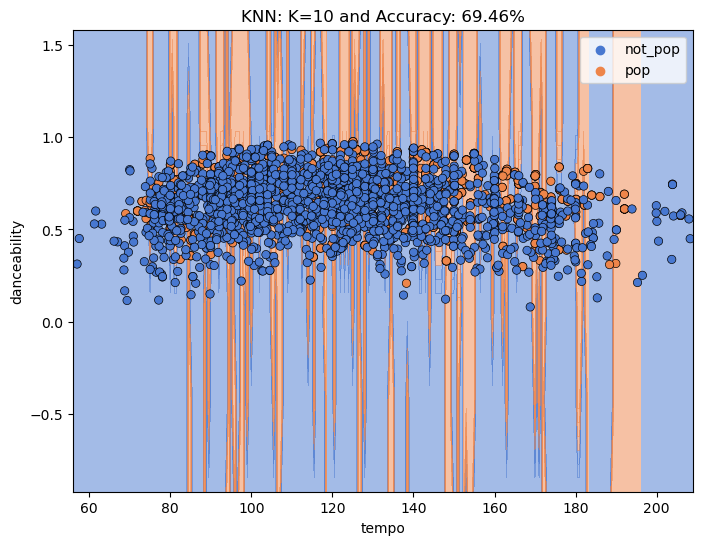

In [278]:
plot_decision_boundary(knn_model,X_test,y_test)

## ML Model 4 - SVM Linear Classifier

In [286]:
from sklearn import svm, datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay, auc

# Creating the data
X=X_train
y=y_train
target_names = ['not_pop', 'pop']

In [280]:
classifier = svm.SVC(kernel="linear")
classifier.fit(X, y);

In [282]:
cm = confusion_matrix(y_test, classifier.predict(X_test))
cm

array([[323, 221],
       [208, 371]])

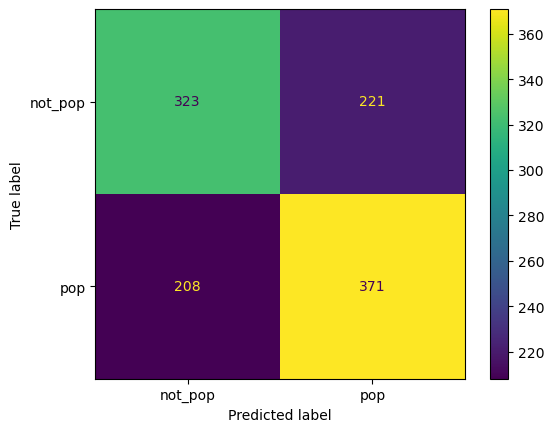

In [287]:
# display it on the subplot figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

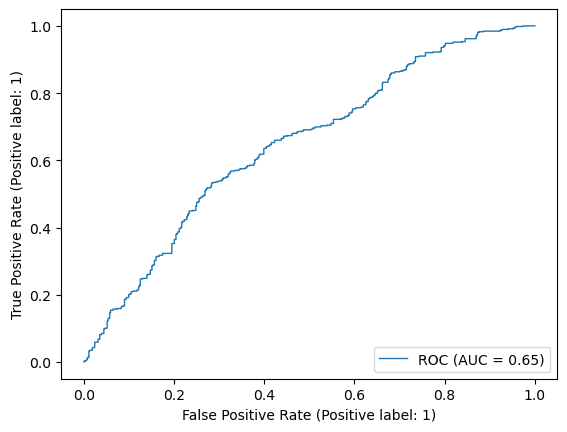

In [288]:
RocCurveDisplay.from_estimator(classifier,X_test,y_test,name='ROC',lw=1);

In [292]:
print('Classification report:')
print(classification_report(y_test, classifier.predict(X_test), target_names=target_names))

Classification report:
              precision    recall  f1-score   support

     not_pop       0.61      0.59      0.60       544
         pop       0.63      0.64      0.63       579

    accuracy                           0.62      1123
   macro avg       0.62      0.62      0.62      1123
weighted avg       0.62      0.62      0.62      1123



# Comparison/Evaluation/Comments

Here, write down your thoughts on the above 4 models.

* How did they perform individually? 
* How can we compare them?
* Which one did "best" and why do you think this?
* etc.

**Include any figures/plots in your explanation to help your explanation!**

<br/>
<div class='info'>
    
<font size='5'>🙋🏽‍♀️</font> **Hint**: A confusion matrix is probably a good start!
    
</div>

---

- The Mean Square Error for the Linear Regression was 0.2328 with an RMSE of 0.482499
- The Score for the Logistic Regression was 60.99%
- The Acccuracy for the KNN was 69.46%
- The Accuracy and F-1 score for the linear SVM was 62%

These measures can individually show how good the models did on predicting on the withheld test set and by comparing the accuracy measures across the models you can see which performed best. Some measured error and some measured accuracy, so the error mesaures need to be flipped to measure the accuracy of the model to compare to the other models. 

By making a confusion matrix and classification report for each model we can standardize the comparison and see what is really performing the best on the withheld testset.
By comparing the confusion matrixes for each we can see 
- linear regression has a .61 f1-score accuracy 
- logistic regression has a .61 f1-score accuracy 
- KNN has a .64 f1-score accuracy 
- SVM has a .62 f1-score accuracy 

With the ROC curves, the logistic has a AUC of.65, the KNN had a AUC of .71 and the SVM has a AUC of .65.

The model that performed the best was the KNN with an accuracy of 69.46% and a 64% f-1 score accuracy which makes sense since I chose the amount of neighborhoods and optimized that for the highest accuracy, so there is potentially an issue that that is the an overfit model, but it does perform the best on the withheld test set which the other models do not do as well with. It performs the best on both its individual evaluation and the confusion matrix evalutions for all the models.

---

In [321]:
# RMSE for linear regression
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.48249991591192154


In [366]:
linpred=lm2.predict(X_test)
linpred[linpred > .5] = 1
linpred[linpred < .5] = 0
linpred

array([0., 1., 1., ..., 0., 0., 1.])

In [367]:
#linear CM
lincm = confusion_matrix(y_test, linpred)
lincm

array([[333, 211],
       [225, 354]])

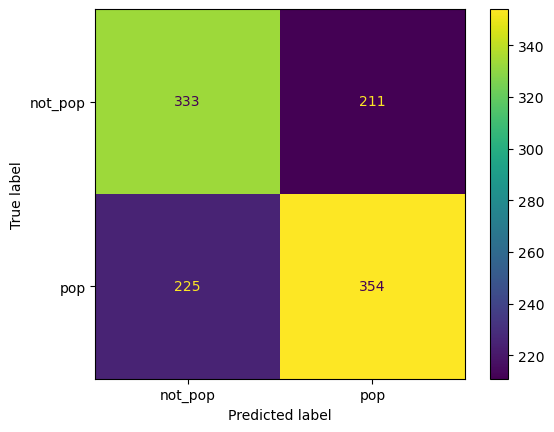

In [368]:
# display it on the subplot figure
disp = ConfusionMatrixDisplay(confusion_matrix=lincm, display_labels=target_names)
disp.plot();

In [370]:
print('Linear Classification report:')
print(classification_report(y_test, linpred, target_names=target_names))

Linear Classification report:
              precision    recall  f1-score   support

     not_pop       0.60      0.61      0.60       544
         pop       0.63      0.61      0.62       579

    accuracy                           0.61      1123
   macro avg       0.61      0.61      0.61      1123
weighted avg       0.61      0.61      0.61      1123



In [333]:
#Score for Regression Model 
clf.score(X_test, y_test)

0.609973285841496

In [344]:
#Logistic CM
logcm = confusion_matrix(y_test, clf.predict(X_test))
logcm

array([[334, 210],
       [228, 351]])

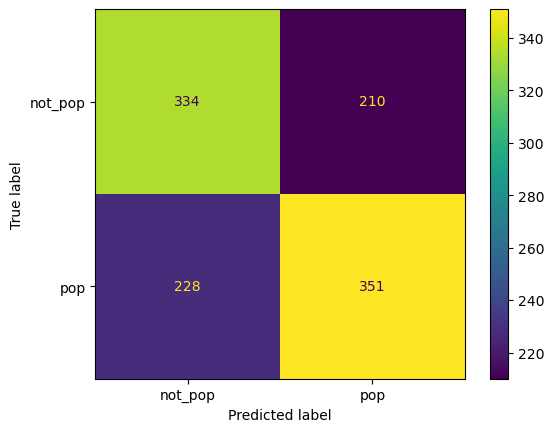

In [345]:
# display it on the subplot figure
disp = ConfusionMatrixDisplay(confusion_matrix=logcm, display_labels=target_names)
disp.plot();

In [340]:
print('Logistic Classification report:')
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

Logistic Classification report:
              precision    recall  f1-score   support

     not_pop       0.59      0.61      0.60       544
         pop       0.63      0.61      0.62       579

    accuracy                           0.61      1123
   macro avg       0.61      0.61      0.61      1123
weighted avg       0.61      0.61      0.61      1123



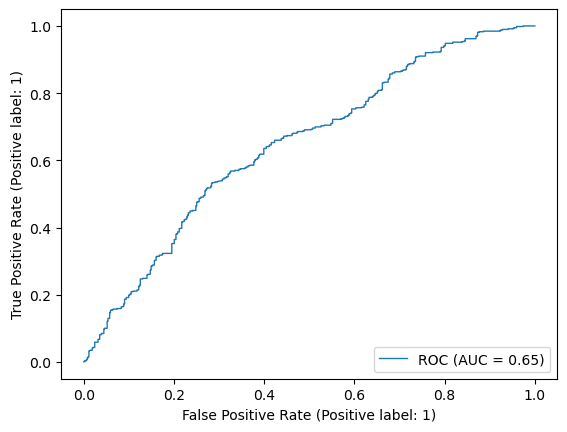

In [372]:
RocCurveDisplay.from_estimator(clf,X_test,y_test,name='ROC',lw=1);

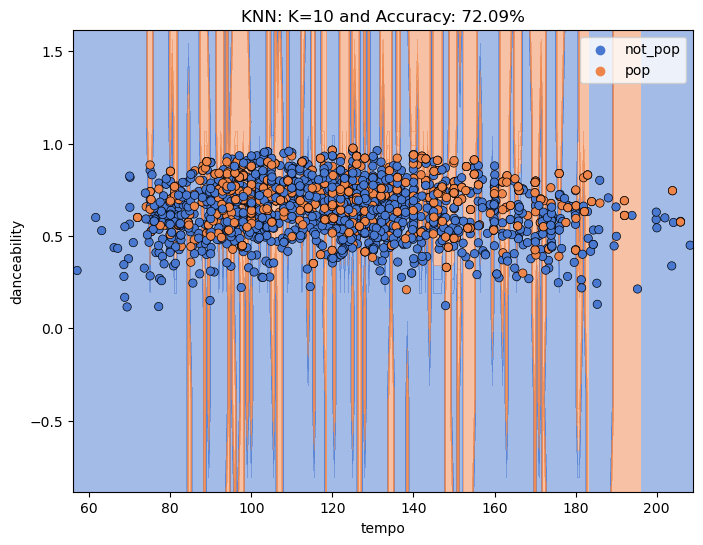

In [323]:
#KNN plot
plot_decision_boundary(knn_model,X_test,y_test)

In [343]:
#KNN CM
knncm = confusion_matrix(y_test, knn_model.predict(X_test))
knncm

array([[348, 196],
       [207, 372]])

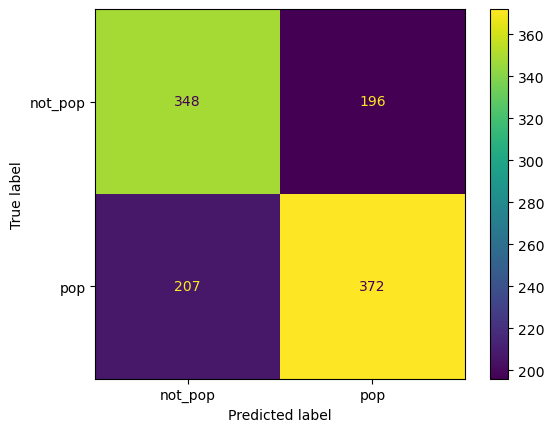

In [342]:
# display it on the subplot figure
disp = ConfusionMatrixDisplay(confusion_matrix=knncm, display_labels=target_names)
disp.plot();

In [371]:
print('KNN Classification report:')
print(classification_report(y_test, knn_model.predict(X_test), target_names=target_names))

KNN Classification report:
              precision    recall  f1-score   support

     not_pop       0.63      0.64      0.63       544
         pop       0.65      0.64      0.65       579

    accuracy                           0.64      1123
   macro avg       0.64      0.64      0.64      1123
weighted avg       0.64      0.64      0.64      1123



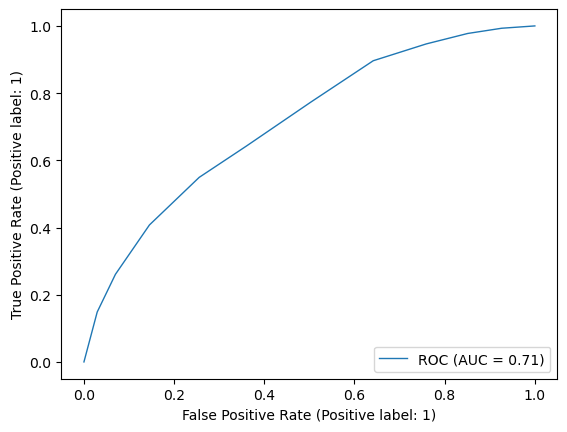

In [373]:
RocCurveDisplay.from_estimator(knn_model,X_test,y_test,name='ROC',lw=1);

In [348]:
#SVM CM
svmcm = confusion_matrix(y_test, classifier.predict(X_test))
svmcm

array([[323, 221],
       [208, 371]])

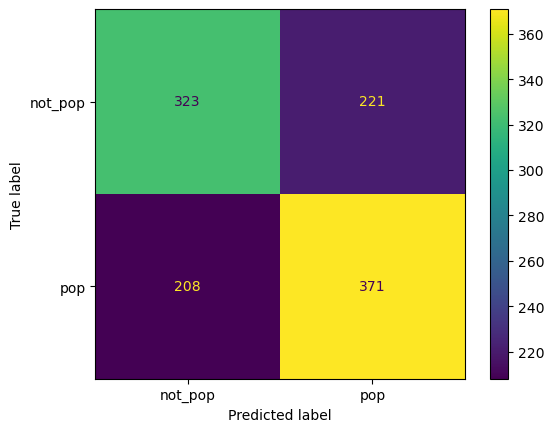

In [349]:
# display it on the subplot figure
disp = ConfusionMatrixDisplay(confusion_matrix=svmcm, display_labels=target_names)
disp.plot();

In [339]:
print('SVM Classification report:')
print(classification_report(y_test, classifier.predict(X_test), target_names=target_names))

SVM Classification report:
              precision    recall  f1-score   support

     not_pop       0.61      0.59      0.60       544
         pop       0.63      0.64      0.63       579

    accuracy                           0.62      1123
   macro avg       0.62      0.62      0.62      1123
weighted avg       0.62      0.62      0.62      1123



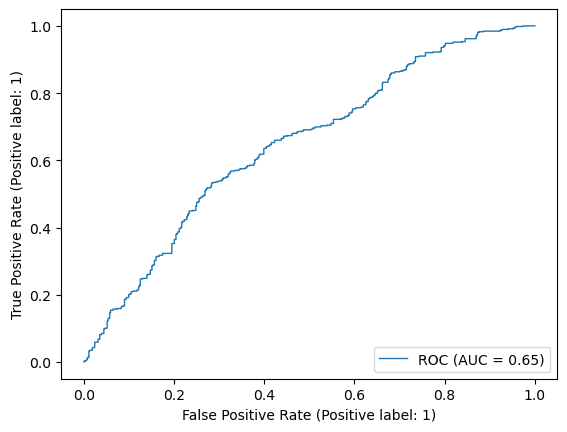

In [375]:
RocCurveDisplay.from_estimator(classifier,X_test,y_test,name='ROC',lw=1);

---

# Bonus - B3 - NN

<br/>
<div class='info'>
    
<font size='5'>🙋🏽‍♀️</font> **Pause-and-Ponder:**  If we were to train a NN on this dataset, how big should our input layer be? How big should your output layer be?
    
</div>

---

Since neural networks do well with high variance and generate artifically low bias there is the potential for lots of weights that grow exponentially, so the structure taken with these four models of selecting two predictive features and training on those two to generate labels would not be necessary since you could include all the features known about the dataset and then see how the model performs. This would mean the input layer would be the amount of information we start with, which here is the 14 numeric features, so 14 input nodes. Since the nerual network is trying to predict class, here if the song is popular or not, then the output layer would be one layer of the binary classification.

---